# Fitting Physical Models to Data 

## The Likelihood Function 

Suppose a probablity distribution for a random variable $x$ is parameterized by a set of parameters $\boldsymbol{\theta}$, $P(x|\boldsymbol{\theta})$. Up until now, when discussing probability distributions we have been assuming that the parameter(s), $\boldsymbol{\theta}$, are known and fixed, and that $P(x |\boldsymbol{\theta})$ gives the probability that specific values of $x$ will occur. As a concrete example, consider the normal distribution $\mathcal{N}(x |\mu, \sigma)$ where $\boldsymbol{\theta} = (\mu, \sigma)$, would represent the mean and standard deviation of the distribution. Now let us assume that the $\boldsymbol{\theta}$ parameters are not known. Instead, we are given a set of samples (i.e. measurements!) of $x$, and we wish to infer $\boldsymbol{\theta}$ from these samples. 

Let the measured value of $x$ be denoted by ${\hat x}$. If we evaluate the probability distribution at ${\hat x}$, then we define the likelihood function 
as
$$
L({\hat x}|\boldsymbol{\theta}) = P({\hat x}|\boldsymbol{\theta}). 
$$
Now in the expression above, ${\hat x}$ is a known fixed quantity (not a random variable), the elements of $\boldsymbol{\theta}$ are now the variables
of interest, which are the independent variables of the likelihood function. 


## The Maximum Likelihood Principle

Given data points ${\hat x}$ drawn from a probability distribution $P(x|\boldsymbol{\theta})$, the **maximum likelihood principle states** that the best estimate of the parameters $\boldsymbol{\theta}$ are those which
maximize the likelihood function
$$
L({\hat x}|\boldsymbol{\theta}) = P({\hat x}|\boldsymbol{\theta}).
$$

### Example: Single Draw from a Gaussian

Suppose we have a single measurement ${\hat x}$ drawn from a normal distribution $\mathcal{N}(x |\mu, \sigma)$ and we know $\sigma=3$ but we do not know the value of $\mu$.  The likelihood function is then 
$$
L({\hat x}|\mu) = P({\hat x}|\mu) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{({\hat x}-\mu)^2}{2\sigma^2}\right).
$$
Below we plot this likelihood function: 


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats 

seed = 333
rng = np.random.default_rng(seed)

# Generate a single draw from a Gaussian
mu_true = 15
sigma = 3
x_hat = rng.normal(mu_true, sigma)
print(r'x_hat = {:.2f}'.format(x_hat))


x_hat = 12.14


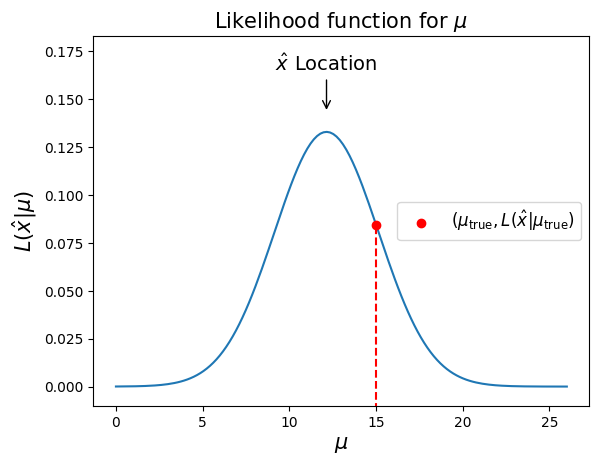

In [2]:
# Create a vector of mu values
mu_values = np.linspace(0, 26, 140)
# No need to do a loop 
L_of_mu = stats.norm.pdf(x_hat, loc=mu_values, scale=sigma)
# x_hat is a float, sigma is a float, but mu_values is an array, scipy.stats.norm.pdf 
# returns an array L_of_mu of the same shape as mu_values

plt.plot(mu_values, L_of_mu)
plt.scatter(mu_true, stats.norm.pdf(x_hat, mu_true, sigma), color='r', zorder=5, label=r'$(\mu_{\rm true}, L({\hat x} | \mu_{\rm true})$')
# Add a vertical dashed line that starts from the x-axis and terminates at the scatter dot
plt.plot([mu_true, mu_true], [-1, stats.norm.pdf(x_hat, mu_true, sigma)], color='r', linestyle='--')
plt.xlabel(r'$\mu$', fontsize=15)
plt.ylabel(r'$L({\hat x} | \mu)$', fontsize=15)
plt.title(r'Likelihood function for $\mu$', fontsize=15)

# Add arrow at the top of the plot indicating the draw location
plt.annotate(r'${{\hat x}}$ Location', xy=(x_hat, max(L_of_mu) + 0.01), xytext=(x_hat, max(L_of_mu) + 0.03), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             verticalalignment='bottom', horizontalalignment='center', fontsize=14)
plt.legend(loc='center right', fontsize=12)
plt.ylim(-0.01, max(L_of_mu) + 0.05)  # adjust y-axis limits to make room for the annotation
plt.show()

###  Example: Projectile Motion   

Imagine a ball moving in the vertical ($y$) direction under the influence of gravity. We know from basic
mechanics that the equation for its trajectory as a function of time is: 
$$
y(t) = y_0 + v_{y0} t - \frac{1}{2} g t^2, 
$$
where $y_0$ is the initial height of the ball, $v_{y0}$ is its initial velocity, and $g$ is the acceleration due to the Earth's gravitational field (we are ignoring air resistance and the Coriolis acceleration). Let's load the parameters into the parameter vector $\boldsymbol{\theta} = (y_0, v_{y0}, g)$, and define the model function 
$$
y_{\rm model}(t, \boldsymbol{\theta}) = y_0 + v_{y0} t - \frac{1}{2} g t^2.
$$

Consider that we have a set of noisy measurements of the position of the particle, $y_i \equiv y(t_i)$, at different times, $t_i$, with standard deviation $\sigma_i$, and that the errors are Gaussian distributed. In other words
$$
y_i = y_{\rm model}(t_i, \boldsymbol{\theta}) + \epsilon_i,
$$
where $\epsilon_i$ is a Gaussian distributed random variable representing the measurement error on the position $y_i = y(t_i)$ at time $t_i$. 
In other words, 
$$
\epsilon_i \sim \mathcal{N}(\epsilon| 0, \sigma_i^2). 
$$

We would like to use the maximum likelihood principle to obtain the best estimate of the parameter vector 
$\boldsymbol{\theta}=(y_0,v_{y0}, g)$. Let's first generate some synthetic data for this example and make a plot to visualize the data. 

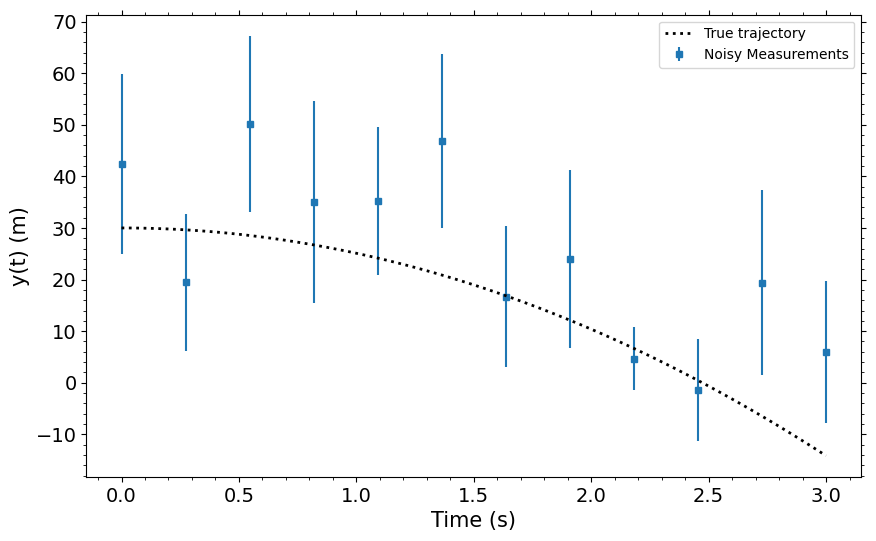

In [3]:
def y_projectile(theta, t):
    """
    Compute the y-coordinate of a projectile as a function of time.
    
    Parameters
    ----------
    theta : array_like
        Parameter vector holding the initial position and velocity, and the acceleration due to gravity according
        to  y_0, v_y0, g = theta
    t : float or array_like
        The time values at which to evaluate the trajectory in seconds.

    Returns
    -------
    y : float or array_like
        The y-coordinate of the projectile at each time t in meters. shape = t.shape
    
    """
    # Unpack the parameters and evaluate
    y_0, v_y0, g = theta
    return y_0 + v_y0 * t - 0.5 * g * t**2

# Define the true value of the parameters
y_0_true = 30.0 # m 
v_y0_true = 0.0 # ball is dropped from rest
g_true = 9.81 # m/s^2 # acceleration due to gravity
# Load them into the parameter tuple
theta_true = (y_0_true, v_y0_true, g_true)

# Let's suppose we have 12 measurements over time =0-3s
t_obs = np.linspace(0, 3, 12)
yoft_model_true = y_projectile(theta_true, t_obs)
# Generate some uniformly distributed random errors in the range [5, 20]
# Each y(t_i) has its own uncertainty and the uncertatinties are different. 
# This is referred to as heteroscedastic noise 
#sigma_y = rng.uniform(1.0, 2.0, len(t_obs))
sigma_y = rng.uniform(5.0, 20.0, len(t_obs)) 


# Generate Gaussian draws about the true values with std. deviation sigma_y
yoft_data = rng.normal(loc=yoft_model_true, scale=sigma_y)
# Alternatively we can generate unit variance Gaussian deviates with mu=0 and sigma=1
# and scale the unit variance deviates by the measurement uncertainty, sigma_y. This 
# follows because recall that if X is Gaussian distributed, then aX is also Gaussian
# distributed with mean a*mu and variance a^2*sigma^2. So below would be equivalent
# to the above:
#gauss_dev =rng.standard_normal(len(t_obs))
#yoft_data = yoft_model_true + sigma_y * gauss_dev

# Evalute the true model on a finer grid for plotting purposes
t_fine = np.linspace(0, 3, 100)
yoft_true_fine = y_projectile(theta_true, t_fine)

# Make a plot of the data with error bars
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(t_obs, yoft_data, yerr=sigma_y, fmt='s', markersize=5, label='Noisy Measurements')
ax.plot(t_fine, yoft_true_fine, 'k:', linewidth=2, zorder=10, label='True trajectory')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('y(t) (m)', fontsize=15)
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

Now that we have examined the data, we will derive an expression for the likelihood function $L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})$, where  $\mathbf{y} = (y(t_1), {y(t_2), \cdots, y}(t_n)) \equiv (y_1, y_2, \cdots, y_n)$ is the vector of measurements, $\boldsymbol{\sigma}= (\sigma(t_1), \sigma(t_2), \cdots, \sigma(t_n) \equiv (\sigma_1, \sigma_2, \cdots, \sigma_n)$ is the vector of standard deviations, and $\boldsymbol{\theta} = (y_0, v_{y0}, g)$ is the vector of parameters. To determine the likelihood function,  we need to construct a probabalistic model for the measurement process and evaluate it at our measurements $\mathbf{y}$. This is easy to do since we know the measurement errors are Gaussian distributed. 
Thus the likelihood function is
<a id='eqn:lhood'></a>
$$
L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) = \prod_i^n \frac{1}{\sqrt{2\pi}\sigma_i}\exp\left\{-\frac{\left[y_i - (y_0 + v_{y0}t_i + gt_i^2)\right]^2}{2\sigma_i^2}\right\} =   \prod_i^n \frac{1}{\sqrt{2\pi}\sigma_i}\exp\left\{-\frac{\left[y_i - y_{{\rm model}, i}(\boldsymbol{\theta})\right]^2}{2\sigma_i^2}\right\},  \tag{1}
$$
where we have defined the shorthand notation $y_{{\rm model}, i}(\boldsymbol{\theta}) \equiv  y_{\rm model}(t_i | \boldsymbol{\theta}) = y_0 + v_{y0}t_i + gt_i^2$.  It is worth pausing to understand what we are doing here. The likelihood function expresses the probability of measuring the data $\mathbf{y}$ given a value of the parameters $\boldsymbol{\theta} = (y_0, v_{y0}, g)$. The product in the likelihood function is a consequence of the fact that the *measurements are all stastistically independent*, i.e. 

$$ 
L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) = \mathcal{N}(y_1| \mu_1, \sigma_1)\mathcal{N}(y_2| \mu_2, \sigma_2)\cdots \mathcal{N}(y_n| \mu_n, \sigma_n),
$$
where $\mu_i = y_{{\rm model}, i}$.  This is in fact a consequence of what we learned previously for the joint distribution of statistically independent random variables
$$
P(\mathbf{x}) \equiv P(x_1, x_2, \cdots, x_n) = P(x_1)P(x_2)\cdots P(x_n).
$$

We can further simplify eqn.(<a href="#eqn:lhood">1</a>) by noting that 
<a id='eqn:lhood_chi2'></a>
$$
\begin{align}
L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) =&  \frac{1}{\sqrt{2\pi}\sigma_1}\exp\left\{-\frac{\left[y_1 - y_{{\rm model}, 1}(\boldsymbol{\theta})\right]^2}{2\sigma_1^2}\right\}\frac{1}{\sqrt{2\pi}\sigma_2}\exp\left\{-\frac{\left[y_2 - y_{{\rm model}, 2}\boldsymbol{\theta})\right]^2}{2\sigma_2^2}\right\}\times \cdots \times \frac{1}{\sqrt{2\pi}\sigma_n}\exp\left\{-\frac{\left[y_n - y_{{\rm model},n}(\boldsymbol{\theta})\right]^2}{2\sigma_n^2}\right\}\nonumber\\
=& \frac{1}{(2\pi)^{n/2}\sigma_1\sigma_2\cdots\sigma_n}\exp\left\{-\frac{\left[y_1 - y_{{\rm model},1}(\boldsymbol{\theta})\right]^2}{2\sigma_1^2} - \frac{\left[y_2 - y_{{\rm model},2}(\boldsymbol{\theta})\right]^2}{2\sigma_2^2} - \cdots - \frac{\left[y_n - y_{{\rm model},n}(\boldsymbol{\theta})\right]^2}{2\sigma_n^2}\right\}\nonumber\\
=& \frac{1}{(2\pi)^{n/2}\sigma_1\sigma_2\cdots\sigma_n} \exp\left\{-\frac{\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})}{2}\right\}, \tag{2}
\end{align}
$$
where in the last step we used the property of the exponential function, i.e. $\exp(a)\exp(b) = \exp(a+b)$, and defined the **chi-squared** statistic
<a id='eqn:chi2'></a>
$$
\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) \equiv \sum_{i=1}^n \left[\frac{y_i-y_{{\rm model},i}(\boldsymbol{\theta})}{\sigma_i}\right]^2. \tag{3}
$$


It is convenient and common practice to work with the logarithm of the likelihood. This is because the likelihood function is typically a product of many probabilities (of making each measurement in a dataset) which are in general numbers less than one. Furthermore, in the outskirts of the probability distributions, the probability values can be very small. Multiplying many small numbers can underflow the numerical precision of the computer. Taking the logarithm can better accomodate a large dynamic range, and turns the multiplications of small numbers into additions, which  are numerically more stable.  Taking the logarithm of the likelihood function, we have
<a id='eqn:lnL'></a>
$$
\ln L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma}) = -\frac{n}{2}\ln(2\pi) - \frac{1}{2}\sum_{i=1}^n \ln(\sigma_i^2) - \frac{\chi^2(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})}{2}. \tag{4}
$$

Note that, with respect to the parameters $\boldsymbol{\theta}$, the first two terms in eqn.(<a href="#eqn:lnL">4</a>) are constant. 
Thus it is clear that **maximizing the likelihood** is equivalent to **minimizing the chi-squared**. 
This is the basis of the idea of **$\chi^2$ minimization** which is a common approach to fitting data across the physical sciences.

In [4]:
from scipy import optimize

def chi2(theta, y_data, sigma_y, t_obs):
    """
    Compute the chi-squared value of the projectile model given the data and model parameters.
    
    Parameters
    ----------
    theta : array_like
        The model parameters.
    y_data : array_like
        The data values, units are meters.
    sigma_y : array_like
        The standard deviation of the data values, units are meters.
    t_obs : array_like
        The time values at which the data was observed, units are seconds.
    """
    y_model = y_projectile(theta, t_obs)
    return np.sum(((y_data - y_model) / sigma_y)**2)

# Make an initial guess for the parameters. It is cheating to use the true values!
theta_guess = [20, 5, 15] # theta = (y_0, v_y0, g)
# This tuple holds the additional arguments for the chi2 function above that we want to minimize, 
# i.e. the convention is that chi2 is minimized with respect to the first argument, theta.
chi2_args = (yoft_data, sigma_y, t_obs)
result = optimize.minimize(chi2, theta_guess, args=chi2_args, bounds=[(None, None), (None, None), (None, None)])
# Note that we used the bounds argument to specify that we perform the optimization over an unbounded domain, since
# the parameters (y_0, v_y0, g) can take on any real value.

print(f'The minimum chi^2 value is: {result.fun:.2f}')
print(f'The max-Lhood parameters are: y_0 = {result.x[0]:.2f} m, v_y0 = {result.x[1]:.2f} m/s, g = {result.x[2]:.2f} m/s^2')
print(f'The true parameters are:      y_0 = {y_0_true:.2f} m, v_y0 = {v_y0_true:.2f} m/s, g = {g_true:.2f} m/s^2')

The minimum chi^2 value is: 8.39
The max-Lhood parameters are: y_0 = 40.01 m, v_y0 = -10.74 m/s, g = 2.58 m/s^2
The true parameters are:      y_0 = 30.00 m, v_y0 = 0.00 m/s, g = 9.81 m/s^2


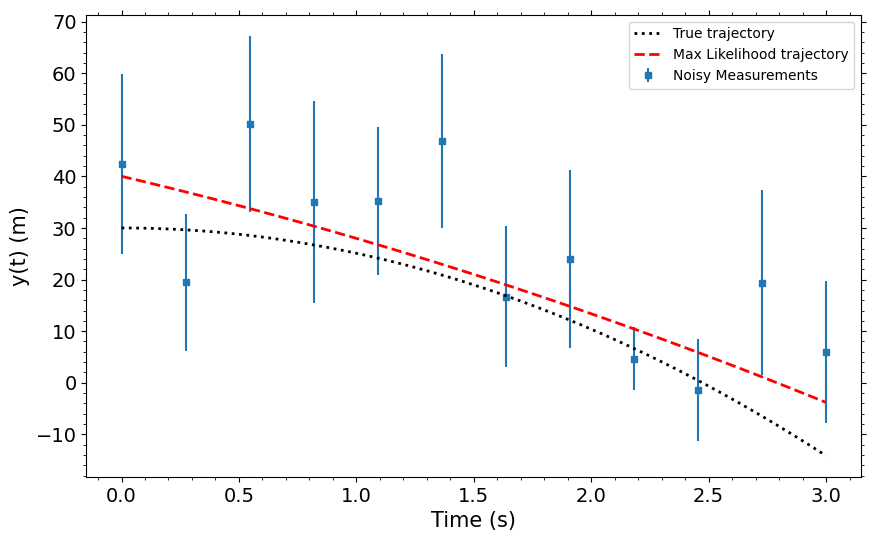

In [5]:
# Evaluate the maxL model on the fine grid of time values for plotting purposes
yoft_model_maxL = y_projectile(result.x, t_fine)
# Make a plot of the data with error bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(t_obs, yoft_data, yerr=sigma_y, fmt='s', markersize=5, label='Noisy Measurements')
ax.plot(t_fine, yoft_true_fine, 'k:', linewidth=2, zorder=10, label='True trajectory')
ax.plot(t_fine, yoft_model_maxL, 'r--', linewidth=2, zorder=10, label='Max Likelihood trajectory')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('y(t) (m)', fontsize=15)
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

## Bayesian Statistics

In the previous example we used the maximum likelihood principle to obtain the best-fit "point" estimate of the parameters for our projectile model, but the maximum likelihood principle does not provide a way to quantify the measurement uncertainty in these parameter estimates. Bayesian statistics provides an elegant formalism for determining how well we know model parameters. 

Previously we introduced Bayes' theorem
$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}. 
$$

Now let's imagine that $x$ is the outcome of an experiment represented by some data we have collected. Let $y=\theta$ be a physical parameter or a set of physical parameters of interest (e.g. the value of a fundamental constant, the distance to a galaxy, or the mass of a particle) that 
we would like to measure from our data in the context of a physical model.  Then we can write Bayes' theorem as
<a id='eqn:bayes'></a>
$$
P(\theta|x) = \frac{P(x|\theta)P(\theta)}{P(x)}. \tag{5}
$$
Since the conditional distribution, $P(x|\theta)$, states that the occurrence of $x$  is conditioned on the occurence of $\theta$, 
we can write the total probability of $x$ occuring as the integral over all possible values of $\theta$
$$
P(x) = \int P(x|\theta)P(\theta)d\theta. 
$$
In other words, the quantity $P(x)$ in the denominator of eqn.(<a href="#bayes">5</a>)
can be thought of as the normalization constant for the distribution $P(\theta|x)$ on the left-hand side
<a id='eqn:bayes2'></a>
$$
P(\theta|x) = \frac{P(x|\theta)P(\theta)}{P(x)} = \frac{P(x|\theta)P(\theta)}{\int P(x|\theta)P(\theta)d\theta}\tag{6}, 
$$
in that it ensures that $\int P(\theta|x)d\theta = 1$.

The fundamental objects in Bayesian statistics are probability distributions. The equation above describes how probability distributions evolve as new data $x$ becomes available. To make this more clear, let's modify our notation slightly
<a id='eqn:bayes3'></a>
$$
P(\theta|x) = \frac{L(x|\theta)Pr(\theta)}{\int L(x|\theta)Pr(\theta)d\theta}.  \tag{7}
$$
- $L(x|\theta)$ is the **likelihood function** that we discussed above, which is the probability of observing the data $x$ given the parameter $\theta$. The $x$ are taken to be the *fixed* set of measurements, and $\theta$ is the independent variable of interest. 
- $Pr(\theta)$ is the **prior distribution**, which is the probability of the parameter $\theta$ based on existing knowledge *before* acquiring the
data $x$.
- $P(\theta|x)$ is the **posterior  distribution**, which is the revised probability for $\theta$ given the combination of our prior knowledge and the new data $x$ that we acquired. 

We don't have to worry about the normalization of the likelihood, $L(x|\theta)$, or the prior, $Pr(\theta)$, since in the product $L(x|\theta)Pr(\theta)$ in the numerator, any constant factors are going to cancel in the division by the normalization factor in the denominator.

### The Flow of Information

Bayesian inference provides a well-defined quantitative logical framework for synthesizing information about the world we live in. 
Specifically, it tells us how to merge new information (the new data $x$) with existing knowledge (the prior) to yield new probability distributions (the posterior). 

There are several important features of Bayesian statistics:
1. The key ingredients are the $\theta$ dependent probability distributions in the numerator of eqn. (<a href="#bayes3">7</a>):
   * $Pr(\theta)$: we are required to explicitly adopt a prior probability distribution that reflects our existing knowledge of $\theta$. 
   *  $L(x|\theta)$: we are required to construct a **generative probablistic model** for the measurement process, which is the likelihood function, $L(x|\theta)$. 
  
2. Any amount of new data, $x$, even a single measurement, can be used to revise the probability distribution for $\theta$, yielding a new posterior $P(\theta|x)$. 
   
3. There is no need to pre-specify the end point of an experiment or investigation. Data can be incorporated as they become available. Essentially, one replaces the prior $Pr(\theta)$ with the posterior $P(\theta|x)$, and then obtains new data, cycling through the inference loop as often as desired. This is illustrated by the flow chart below. 


<div style="text-align: left">
    <img src="figures/bayesian_flow.png" style="width: 1000px; margin-left: 20px;"/>
</div>


### Example: The Distance to a Galaxy

An astronomical catalog indicates that the distance to a galaxy is $D_0 = 11 \pm 4$ Mpc. Here Mpc is an astronomical distance unit that stands for megaparsecs, i.e. one million parcsecs, where $1~{\rm pc} = 3.086 \times 10^{16}~{\rm m}$. It is understood that the quoted distance and uncertainty are the mean and standard deviation, $\sigma_0 = 4~{\rm Mpc}$, of a Gaussian distribution that represents our current knowledge of the distance. Suppose we make a new measurement of the distance to this galaxy, $D_1 = 7.3\pm 2~{\rm Mpc}$, where again the measurement errors are Gaussian distributed and $\sigma_1=2~{\rm Mpc}$.  What is the revised probability distribution for the distance to the galaxy in light of our new measurement?



The problem states that both our prior knowledge and the new  measurement are described by Gaussians.  To clarify the notation: 
- $D$ denotes the random variable representing the unknown distance to the galaxy (the $\theta$ parameter in the notation of Bayes theorem). 
- $D_0$ is the mean of the distance from the prior probability distribution (with standard deviation $\sigma_0$) to the galaxy. 
- $D_1$ is the new measurement (with standard deviation $\sigma_1$) of the distance (the data $x$ in the notation of Bayes theorem). 

Since the probability distributions are all Gaussian we can write
$$
Pr(D) = \frac{1}{\sqrt{2\pi}\sigma_0}\exp\left[-\frac{(D-D_0)^2}{2\sigma_0^2}\right]
$$
and 
$$
L(D_1|D) = \frac{1}{\sqrt{2\pi}\sigma_1}\exp\left[-\frac{(D_1-D)^2}{2\sigma_1^2}\right]. 
$$

The (unnormalized) posterior distribution is then 
$$
P(D |D_1) \propto L(D_1|D)Pr(D) = \frac{1}{\sqrt{2\pi}\sigma_1}\exp\left[-\frac{(D_1-D)^2}{2\sigma_1^2}\right]\frac{1}{\sqrt{2\pi}\sigma_0}\exp\left[-\frac{(D-D_0)^2}{2\sigma_0^2}\right].
$$

It is easy to show that the product of two Gaussian probability distributions is also a Gaussian, so we can rewrite the posterior distribution (now normalized) as
$$
P(D |D_1) = \frac{1}{\sqrt{2\pi}\sigma_\ast}\exp\left[-\frac{(D-D_\ast)^2}{2\sigma_\ast^2}\right], 
$$
where 
<a id='eqn:mean'></a>
$$
D_\ast = \frac{w_0 D_0 + w_1 D_1}{w_0 + w_1} = \frac{\sigma_1^2 D_0 + \sigma_0^2 D_1}{\sigma_0^2 + \sigma_1^2}, \tag{8}
$$
and 
<a id='eqn:sigma'></a>
$$
\sigma_\ast^2 = \frac{1}{w_0 + w_1} =  \frac{\sigma_0^2 \sigma_1^2}{\sigma_0^2 + \sigma_1^2} = \sigma_0^2\left(\frac{\sigma_1^2}{\sigma_0^2 + \sigma_1^2}\right). \tag{9}
$$
and we defined the *weights* 
$$
w_0 = \frac{1}{\sigma_0^2} \quad \text{and} \quad w_1 = \frac{1}{\sigma_1^2}.
$$

Because the posterior is a Gaussian, the mean value and standard deviation of the distance to the galaxy, $D$, can be extracted by 
inspection, i.e. 
$$
\langle D\rangle \pm \sigma_D = D_\ast \pm \sigma_\ast. 
$$
Moreover, the expressions for $D_\ast$ and $\sigma_\ast$ are consistent with our intuition:

- The mean value, $\langle D\rangle$, is a weighted average of the prior distance and the new measurement, where the weights are inversely proportional to their respective variances.   In other words, we are *optimally combining* the information -- if the new measurement is very precise ($\sigma_1$ is small, $w_1$ is large), then its contribution will dominate the posterior mean, whereas if the prior is very precise ($\sigma_0$ is small, $w_0$ is large), then the prior dominates the posterior mean.   

- The standard deviation, $\sigma_{\rm D}$, of the posterior is the harmonic mean of the standard deviations of the prior and the new measurement. 
From the last equaltiy of eqn.(<a href="#sigma">9</a>), it can be seen that the standard deviation of the posterior is always less than the standard deviation of the prior, as it should be, since given new information, we should be more certain about the value of the parameter.

- It is instructive to consider the limit of the expressions for $D_\ast$ and $\sigma_\ast$ in eqns.(<a href="#mean">8</a>) and (<a href="#sigma">9</a>) $\sigma_1 \ll \sigma_0$ ($w_1  \gg w_0$), i.e. where the new measurement is far more 
  precise than our prior knowledge. This is the limit of an **uninformative prior**, since if $\sigma_1 \ll \sigma_0$  ($w_1  \gg w_0$), then the prior distribution, $Pr(D)$ is becoming very broad (and hence approaching a constant) relative to an extremely narrowly peaked likelihood, $L(D_1|D)$. It is easy to see that in this limit, 
  $$
    D_\ast \approx D_1, \quad \sigma_\ast \approx \sigma_1, 
    $$
  which is to say that the posterior mean and standard deviation are completely dominated by the new measurement. This is the behavior we expect. 

Prior:       D_0    = 11.0 +- 4.0 Mpc
Measurement: D_1    =  7.3 +- 2.0 Mpc
Posterior:   D_star =  8.0 +- 1.8 Mpc


(-5.0, 27.0)

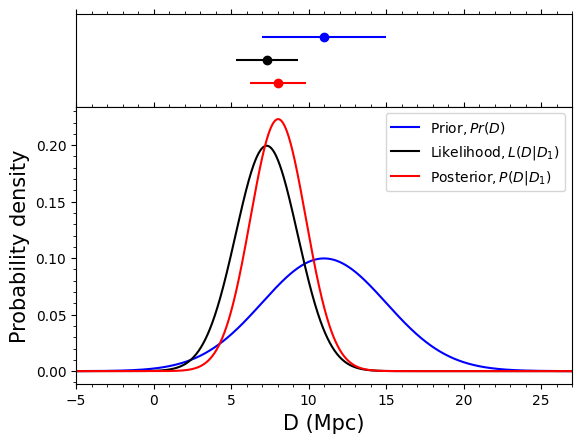

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Parameters for the prior
D_0 = 11.0  # Prior mean, Mpc
sigma_0 = 4.0 # Prior standard deviation, Mpc
# Parameters for the likelihood 
D_1 = 7.3 # Measured distance, Mpc
sigma_1 = 2.0 # Measurement uncertainty, Mpc
# Parameters for the posterior
w_0 = 1/sigma_0**2
w_1 = 1/sigma_1**2
D_star = (w_0*D_0 + w_1*D_1)/(w_0 + w_1)
sigma_star = 1/np.sqrt(w_0 + w_1)

print(f"Prior:       D_0    = {D_0:4.1f} +- {sigma_0:.1f} Mpc")
print(f"Measurement: D_1    = {D_1:4.1f} +- {sigma_1:.1f} Mpc")
print(f"Posterior:   D_star = {D_star:4.1f} +- {sigma_star:.1f} Mpc")

# Compute the prior, the likelihood, and the posterior
D_min = D_0 - 4*sigma_0
D_max = D_0 + 4*sigma_0
D = np.linspace(D_min, D_max, 10000)
Prior = stats.norm.pdf(D, D_0, sigma_0)
Likelihood = stats.norm.pdf(D, D_1, sigma_1)
Posterior = stats.norm.pdf(D, D_star, sigma_star)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0})

# Plot error bars for the prior, measurement, and posterior in the upper subplot
ax1.errorbar(D_0, 3, xerr=sigma_0, fmt='o', color='blue')
ax1.errorbar(D_1, 2, xerr=sigma_1, fmt='o', color='black')
ax1.errorbar(D_star, 1, xerr=sigma_star, fmt='o', color='red')
ax1.set_xlim(D_min, D_max)
ax1.set_ylim(0, 4)
ax1.set(yticks=[])


ax2.plot(D, Prior, color='blue', label=r'${\rm Prior}, Pr(D)$')
ax2.plot(D, Likelihood, color='black', label=r'${\rm Likelihood}, L(D|D_1)$')
ax2.plot(D, Posterior, color='red', label=r'${\rm Posterior}, P(D|D_1)$')

# Add minor ticks
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.set_ylabel('Probability density', fontsize=15)
ax2.set_xlabel('D (Mpc)', fontsize=15)
ax2.legend()
ax2.tick_params(which='both', bottom=True, top=True, labelbottom=True)

# Get x-axis tick locations from ax2 and set them for ax1
ax1.set_xticks(ax2.get_xticks())
ax1.tick_params(which='both', bottom=True, top=True, labelbottom=False)

ax1.set_xlim(D_min, D_max)
ax2.set_xlim(D_min, D_max)

## Example: Projectile Motion Bayesian Inference 

We will now proceed to use Bayesian statistics to infer the probability distribution governing the parameters of the projectile motion model using the synthetic data we generated earlier. In our previous demonstration of maximum likelihood (chi-square minimization) fitting using this data, we fit for the three parameters, $\boldsymbol{\theta} =(y_0, v_{y0}, g)$. In this context,  applying Bayesian inference would thus yield the posterior distribution 
$$ 
P(y_0, v_{y0}, g|\mathbf{y}), 
$$
which is a joint probability distribution for three variables. In general, there is no guarantee that the model parameters are statistically independent, so the joint distribution is not factorizable into a product of individual probability distributions for each parameter.  Since visualizing probability distributions in multiple dimensions is more complicated, we will instead consider just a single parameter model to build intuition. Specifically, we will imagine that we know the height from which we dropped the ball, $y_0=30~{\rm m}$, and that we dropped the ball from rest, $v_{y0}=0$.  We will then use Bayesian inference to infer the probability distribution for the acceleration due to gravity, $g$.


Let's assume that we do not have any prior information on $g$, so we will adopt an uninformative constant prior probability, 
$$
Pr(g) = {\rm const}. 
$$
Note that this means that $g$ can be positive or negative, i.e. we are not assuming any prior knowledge on the direction of the acceleration. Enforcing the positivity of $g$ would correspond to adopting a different piecewise prior 
$$
Pr(g) = \begin{cases} 
{\rm const} & g > 0,\\
0 & g \leq 0.
\end{cases}
$$
As we will see below, whether or not this **choice** for the prior actually matters will depend on the accuracy of our measurements. 

According to Bayes' theorem, the posterior distribution for $g$ is then
$$
P(g|\mathbf{y},\boldsymbol{\sigma}) = \frac{L(\mathbf{y}| g, \boldsymbol{\sigma})Pr(g)}{\int L(\mathbf{y}| g, \boldsymbol{\sigma})Pr(g)dg}.
$$
Taking the logarithm of the posterior distribution, we have
$$
\begin{align}
\ln P(g|\mathbf{y}, \boldsymbol{\sigma}) =& \ln L(\mathbf{y}| g, \boldsymbol{\sigma}) + \ln Pr(g) - \ln \int L(\mathbf{y}| g, \boldsymbol{\sigma})Pr(g)dg\nonumber\\
                    =& \ln L(\mathbf{y}| g, \boldsymbol{\sigma}) + {\rm const}.\nonumber
\end{align}
$$
where in the second equality we have exploited the fact that neither second term, $Pr(g) = {\rm const}$, nor the third normalization integral term depend on the variable $g$. It is customary to drop such additive constants to $\ln P$, since the addition of a constant to the logarithm is equivalent to multiplication of $P$ by another constant. Since the posterior distribution has to satisfy a normalization condition
$$
\int P(g|\mathbf{y},  \boldsymbol{\sigma})dg = 1,
$$
(this is imposed by the denominator of the right-hand side of the first equation above) we can drop this constant provided that we normalize the posterior distribution after we have computed it.

We already derived the likelihood function for the projectile motion dataset, $L(\mathbf{y}| \boldsymbol{\theta}, \boldsymbol{\sigma})$ in eqn.(<a href="#eqn:lnL">4</a>). Substituting  $\boldsymbol{\theta} = g$, we have
$$
\ln L(\mathbf{y}| g, \boldsymbol{\sigma}) = -\frac{n}{2}\ln(2\pi) - \frac{1}{2}\sum_{i=1}^n \ln(\sigma_i^2) - \frac{\chi^2(\mathbf{y}| g, \boldsymbol{\sigma})}{2}, 
$$
where $\chi^2(\mathbf{y}| g, \boldsymbol{\sigma})$ is the chi-squared statistic defined in eqn.(<a href="#eqn:chi2">3</a>). Note that the first two terms of this expression are constant with respect to $g$, so we can drop them following the same logic as above for $\ln P(g|\mathbf{y}, \boldsymbol{\sigma})$.

In [7]:
from scipy import integrate, interpolate

# Lambda functions are a compact way to define a function in one line.  
# This is a clever trick since the old chi2 function is a function of the three
# element theta vector, whereas now I just want to vary a single parameter g, 
# i.e. chi2(theta, y_data, sigma_y, t_obs) -> chi2_gonly(g, y_data, sigma_y, t_obs)
chi2_gonly = lambda g, y, sigma_y, t_obs: chi2([30.0, 0.0, g], y, sigma_y, t_obs)


# Define the likelihood function
def log_likelihood(g, ydata, sigma_y, t_obs):
    """
    Compute the log of the likelihood for a given value of g
    
    Parameters
    ----------
    g : float
        The acceleration due to gravity in m/s^2
    ydata : array_like
        The observed positions data at each time in m. 
    sigma_y : array_like
        The uncertainties on the position measurements at each time in m. 
    t_obs : array_like
        The time of each position measurement in s. We assume this is known exactly.

    Returns
    -------
    lnL : float
        The log of the likelihood evaluated at g.  
    """

    return -0.5*chi2_gonly(g, ydata, sigma_y, t_obs)    

# We will redo the likelihood maximization (chi^2 minimization) to use as a point of comparison. 
# The answer will be different now, since before we varied all three parameters (y_0, v_y0, g)
# whereas now we are only varying g.
g_guess = [15.0]
# This tuple holds the extra arguments for the chi2_gonly function. 
chi2_args = (yoft_data, sigma_y, t_obs)

# Since maximization and minimization are equivalent up to a sign, we can use the minimize function
# to minimize chi2_gonly, which will maximize the likelihood.
result_g = optimize.minimize(chi2_gonly, g_guess, args=chi2_args, bounds=[(None, None)])
# Notice that we used the bounds argument to explicity specify that we are optimizing over an unbounded domain.
g_maxL = result_g.x[0]
print(g_maxL)

7.920602423178289


Text(0.65, 0.6, '$g = 7.92^{+1.53}_{-1.53}~{\\rm m/s^2}$')

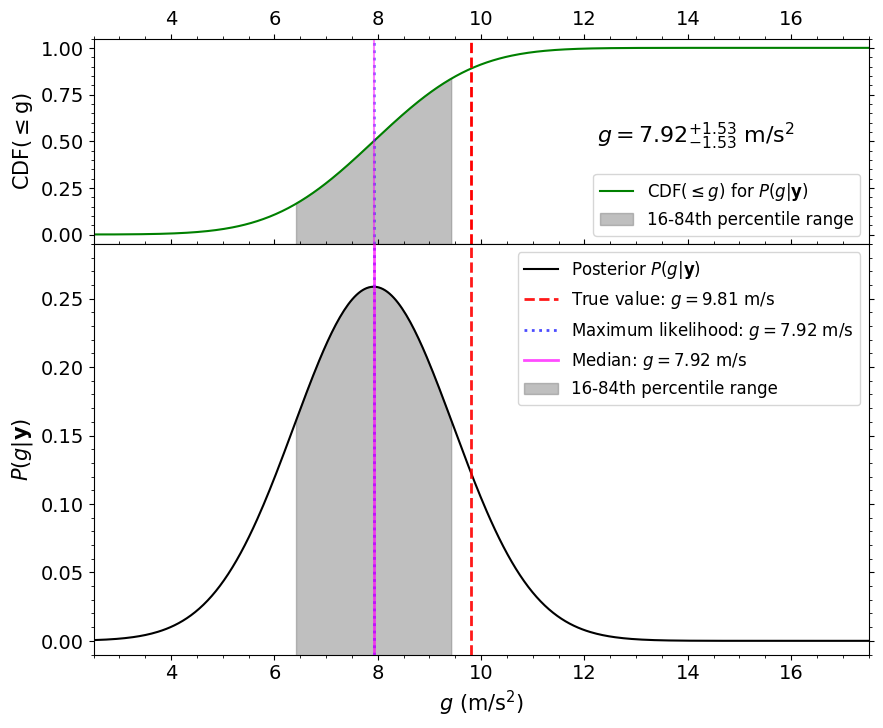

In [8]:
# Evaluate the likelihood as a function of g on a finely spaced grid, from -20 to 20 m/s^2. 

g_values = np.linspace(-20, 20, 1000)
# This list comprehension is compact way to write a for loop, evaluating the likelihood at each g
lnL_values = np.array([log_likelihood(g, yoft_data, sigma_y, t_obs) for g in g_values])
# Rcall that our prior is constant (a.k.a a flat prior or uninformative prior), so the posterior is proporitional 
# to the likelihood. We will normalize in a moment, but we subtract the maximum value of the log-likelihood
# to avoid taking the expoential of very large numbers. You can always add or subtract a constant from lnL
# since that is multiplication of L by a constant, and multiplying by constants will drop out when normalizing.
P_unnorm = np.exp(lnL_values - np.max(lnL_values))
# Now perform the normalization by integrating the tabulated unnormalized posterior using the trapezoidal rule
P_norm = integrate.trapezoid(P_unnorm, g_values)
# This is the final normalized posterior
Pofg = P_unnorm/P_norm

# Compute the cumulative distribution function (CDF) of the posterior using the scipy.intergrate cumulative_trapezoid 
# function. For a grid of y values evaluated at a grid of x values, cumulative_trapezoid returns to you an array that has been
# trapezoidal rule integrated up to the index (x-location) of the array. In other words: 
# cdf[0] = \int_x[0]^x[0] P(y) = 0 (hence the initial=0 argument below)
# cdf[i] = \int_x[0]^x[i] P(y)  and 
# cdf[-1] = \int_x[0]^x[-1] P(y) = 1. This should equal to 1 given the normalization of the posterior that we performed above. 

cdf = integrate.cumulative_trapezoid(Pofg, g_values, initial=0)
# Determine the 16th, 50th, and 84th percentiles of the posterior from the CDF. Note that this actually requires 
# inverting the CDF, i.e. g_16 = CDF^{-1}(0.16). We perform this inversion via a linear interpolation. In other words, 
# if y(x)=f(x) is a function then x(y) = f^{-1}(y) is the inverse function, which can be computed via 
# xofy = interpolate.interp1d(y_values, x_values)(y).
cdf_inverse = interpolate.interp1d(cdf, g_values)  # this returns a callable function for the inverse CDF
# We will also use this inverse function when we sample from the posterior later. 
g_16 = cdf_inverse(0.16) # 16th percentile (equivalent to mu - 1sigma for a Gaussian)
g_50 = cdf_inverse(0.50) # 50th percentile (median, equivlaent to mu for a Gaussian)
g_84 = cdf_inverse(0.84) # 84th percentile (equivalent to mu + 1sigma for a Gaussian)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.0})

# Plot the CDF in the upper subplot
ax1.plot(g_values, cdf, color='g', label=r'${\rm CDF}(\leq g)$ for $P(g|\mathbf{y})$')
ax1.fill_between(g_values, -5, cdf, where=((g_values >= g_16) & (g_values <= g_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
# vertical lines at the true, maxL, and median values
ax1.axvline(g_true, color='r', linestyle='--', linewidth=2.0)
ax1.axvline(g_maxL, color='b', linestyle=':', alpha=0.5, linewidth=2.0)
ax1.axvline(g_50, color='magenta', linestyle='-', alpha=0.5)

ax1.set_ylabel(r'${\rm CDF(\leq g)}$', fontsize=15)
ax1.legend(loc='lower right', fontsize=12)
ax1.set_ylim(-0.05, 1.05)

# Plot the posterior distribution in the lower subplot
ax2.plot(g_values, Pofg, color='k', label=r'Posterior $P(g|\mathbf{y})$')
# vertical lines at the true, maxL, and median values
ax2.axvline(g_true, color='r', linestyle='--', alpha=0.9, linewidth=2.0, label=r'True value: $g=9.81~{\rm m/s}$', zorder=3)
ax2.axvline(g_maxL, color='b', linestyle=':', linewidth=2.0, alpha=0.7, label=r'Maximum likelihood: $g={:.2f}~{{\rm m/s}}$'.format(g_maxL), zorder=3)
ax2.axvline(g_50, color='magenta', linestyle='-', linewidth=2.0, alpha=0.7, label=r'Median: $g={:.2f}~{{\rm m/s}}$'.format(g_50), zorder=4)
ax2.fill_between(g_values, -10.0, Pofg, where=((g_values >= g_16) & (g_values <= g_84)), color='gray', alpha=0.5, label='16-84th percentile range', zorder=1)
ax2.set_xlabel(r'$g~({\rm m/s^2})$', fontsize=15)
ax2.set_ylabel(r'$P(g|\mathbf{y})$', fontsize=15)
ax2.set_xlim(2.5, 17.5)
ax2.set_ylim(-0.01, 0.29)

# Some tick mark things
ax1.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=False, labeltop=True,labelsize=14)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())


# Some tick mark things
ax2.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Add the legend from the upper plot to the lower plot
ax2.legend(loc='upper right', fontsize=12)

# Add text indicating the precision of the measurement, as g = g_50^{+g_84-g_50}_{-g_50-g_16}
precision_text = r'$g = {:.2f}^{{+{:.2f}}}_{{-{:.2f}}}~{{\rm m/s^2}}$'.format(
    g_50, g_84 - g_50, g_50 - g_16)
ax1.text(0.65, 0.6, precision_text, transform=ax1.transAxes, fontsize=16, verticalalignment='top')

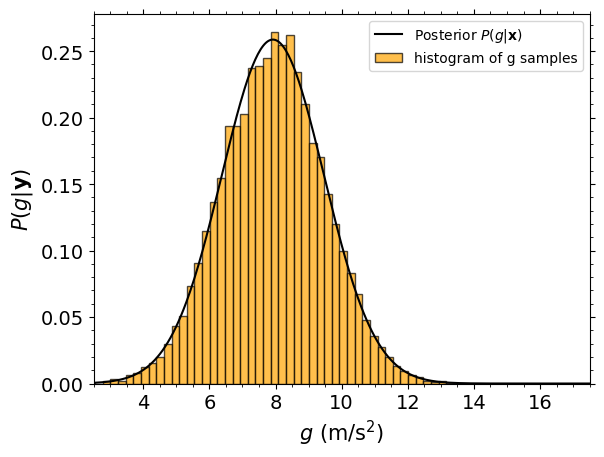

In [9]:
# Generate a set of random samples from the CDF using the inverse CDF method discussed in Week9 02_sampling_arbitrary_distributions.ipynb
nsamp = 10000
uniform_samples = rng.uniform(0, 1, nsamp)
g_samples = cdf_inverse(uniform_samples)

# Make a histogram of the samples on top of the posterior to verify our sampling worked. 
fig, ax = plt.subplots()

# Compute the probability density, P(y), of the y_samples using np.histogram and 50 bins
bins = np.linspace(g_samples.min(), g_samples.max(), 51)
Pofg_hist, _ = np.histogram(g_samples, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], Pofg_hist, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='histogram of g samples')
# Plot the posterior distribution in the lower subplot
plt.plot(g_values, Pofg, color='k', label=r'Posterior $P(g|\mathbf{x})$')

plt.xlabel(r'$g~({\rm m/s^2})$', fontsize=15)
plt.ylabel(r'$P(g|\mathbf{y})$', fontsize=15)
plt.xlim(2.5, 17.5)
# Some tick mark things
plt.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labeltop=False, labelsize=14)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.legend(loc='upper right', fontsize=10)

plt.show()


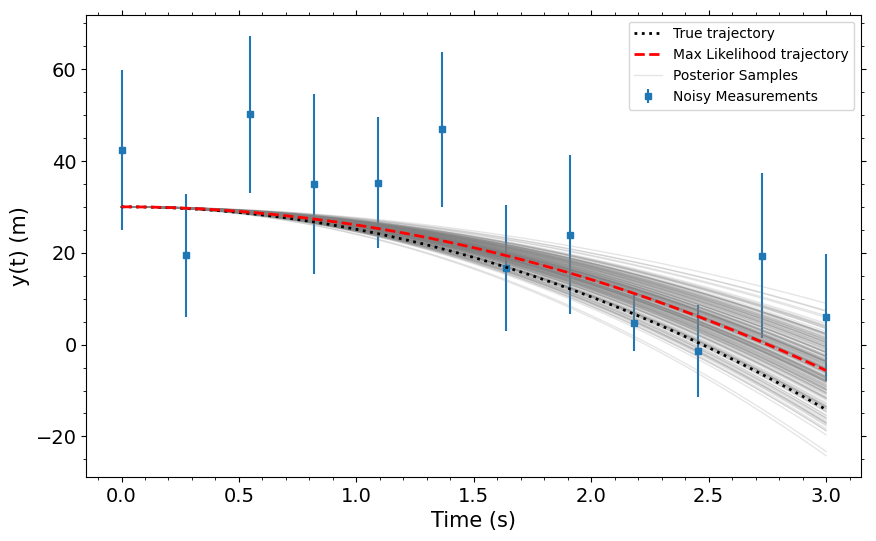

In [10]:
# Evaluate the model at the maximum likelihood value of g (from the single parameter chi^2 minimization)
yoft_model_g_maxL = y_projectile([y_0_true, v_y0_true, g_maxL], t_fine)
# Make a plot of the data with error bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(t_obs, yoft_data, yerr=sigma_y, fmt='s', markersize=5, label='Noisy Measurements')
ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('y(t) (m)', fontsize=15)

# Overplot the true value and the maximum likelihood value 
ax.plot(t_fine, yoft_true_fine, 'k:', linewidth=2, zorder=10, label='True trajectory')
ax.plot(t_fine, yoft_model_g_maxL, 'r--', linewidth=2, zorder=10, label='Max Likelihood trajectory')

# Randomly select 100 samples from the posterior samples that we generated above
g_samp_200 = rng.choice(g_samples, size=200, replace=False)
# Plot 200 random samples from the posterior as thin gray lines to show the spread of the model from these model realizations
for ig, g_sample in enumerate(g_samp_200):
    yoft_gsamp = y_projectile([y_0_true, v_y0_true, g_sample], t_fine)
    ax.plot(t_fine, yoft_gsamp, 'gray', alpha=0.2, linewidth=1, label='Posterior Samples' if ig == 0 else None)
    
ax.legend()

# Some tick mark things
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True, labelbottom=True, labelsize=14)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

